In [7]:
using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using TableTransforms

### 1. Generate Random Data

In [8]:
rng = Random.default_rng()

type="ColTable"
num_rows = 50
num_features = 5
probs = [0.5, 0.2, 0.3]
y_ind = 3

Xy, _ = generate_imbalanced_data(num_rows, num_features; probs, type, insert_y=y_ind, rng=42)
X, y = generate_imbalanced_data(num_rows, num_features; probs, type, rng=42)

((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.12897177983538477, 0.6863866635957644, 0.9452279486233184, 0.6135953031731222, 0.7393683025755258, 0.49776424409145725, 0.6193417397007426, 0.363826187287986, 0.7584295856669816, 0.2184451048446261], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.4479438784027816, 0.23004681363952995, 0.021532597906190776, 0.8482825697641306, 0.10773487816863903, 0.32189982199036116, 0.9651330791713363, 0.18080927897651633, 0.2907506630258835, 0.36872799387588473], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.112262181144075

### 2. Apply ROSE

#### Using Imbalance Only

In [9]:
Xover, yover = rose(X, y; s = 0.3, ratios = Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng = 42)

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:01



Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
  class:  2


((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.399494520815055, 0.9397843011434031, -0.047128787934697935, 0.2380583868567606, 0.9585163725052679, 1.118719716075075, 0.49725631901513656, 0.5333592548437125, 0.6038448908068881, 0.8977523900802187], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.25850467821693374, 0.0395672154211626, 0.7408742651350849, 0.6092716445433745, 0.6600349476197703, -0.011593110769689538, 0.3333761940658044, 0.07989116478133235, 0.035529513011060714, 0.014411882339933905], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.112262181144

#### Using MLJ

In [10]:
rose_model = ROSE(s=0.03, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
mach = machine(rose_model)
Xover, yover = transform(mach, X, y)

((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.5318943622172886, 0.9446835838753268, 0.03739172488343093, 0.2579747459881715, 0.902584360035138, 0.962577125368494, 0.4977134515838252, 0.5430693785701908, 0.5501179421665082, 0.9404803927690084], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.2970188940549365, 0.02333605965768796, 0.6930595253953803, 0.5733683735932951, 0.70967869462057, 0.018220027038602746, 0.32304745919790545, 0.02577629232157916, 0.021340127144551996, 0.020820526349565088], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.11226218114407538

#### Using TableTransforms

In [11]:
rose_model_t = Imbalance.ROSE_t(y_ind, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)

using TransformsBase
#Xy |> rose_model_t
TransformsBase.apply(rose_model_t, Xy)

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:00



Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  class:  2.0


((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.05623567273518981, 0.9270824570236007, -0.26625604338910613, 0.18642338170125083, 1.1035252937241231, 1.5235338401291743, 0.4960711605037216, 0.5081848599972875, 0.7431369798745393, 0.7869760868129859], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.15865300752581546, 0.08164798962276354, 0.8648384052009861, 0.7023541988583951, 0.5313289368769563, -0.08888643101341029, 0.36015439557517187, 0.22018898226958142, 0.07231680970200925, -0.0022031206479987964], Column3 = [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0  …  2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], Column4 = [0.06148979116680608

### 3. Plot the Results

┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = Downloads.RequestError("https://pkg.julialang.org/registries", 6, "Could not resolve host: pkg.julialang.org", Downloads.Response(nothing, "https://pkg.julialang.org/registries", 0, "", Pair{String, String}[]))
└ @ Pkg.Registry /Users/julia/.julia/scratchspaces/a66863c6-20e8-4ff4-8a62-49f30b1f605e/agent-cache/default-macmini-aarch64-4.0/build/default-macmini-aarch64-4-0/julialang/julia-release-1-dot-8/usr/share/julia/stdlib/v1.8/Pkg/src/Registry/Registry.jl:68
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/Manifest.toml`


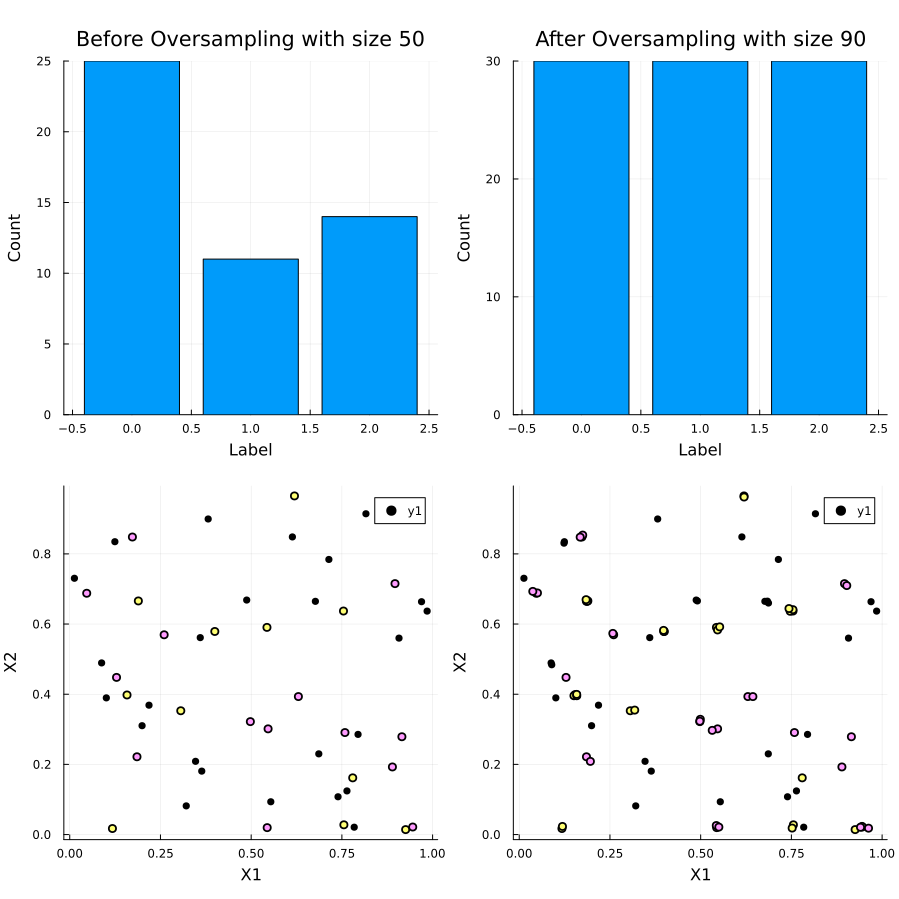

In [12]:
include("plot.jl")
plot_data(y, yover, X, Xover)